Importing Dependencies


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv("/content/loan.csv")

In [ ]:
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


In [ ]:
df.tail()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
56,39,Male,Architect,Master's,Married,100000,770,Approved
57,25,Female,Receptionist,High School,Single,32000,570,Denied
58,43,Male,Banker,Bachelor's,Married,95000,760,Approved
59,30,Female,Writer,Master's,Single,55000,650,Approved
60,38,Male,Chef,Associate's,Married,65000,700,Approved


In [ ]:
df.shape

(61, 8)

Encoding the category

In [ ]:
df.loc[df['gender'] == 'Male', 'gender'] = 0
df.loc[df['gender'] == 'Female', 'gender'] = 1
df['gender'] = df['gender'].astype(int)

In [ ]:
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,0,Engineer,Bachelor's,Married,85000,720,Approved
1,45,1,Teacher,Master's,Single,62000,680,Approved
2,28,0,Student,High School,Single,25000,590,Denied
3,51,1,Manager,Bachelor's,Married,105000,780,Approved
4,36,0,Accountant,Bachelor's,Married,75000,710,Approved


In [ ]:
label_encoder = LabelEncoder()
df['occupation_encoded'] = label_encoder.fit_transform(df['occupation'])
df.drop(columns=['occupation'],inplace=True)
print(df.head())

   age  gender education_level marital_status  income  credit_score  \
0   32       0      Bachelor's        Married   85000           720   
1   45       1        Master's         Single   62000           680   
2   28       0     High School         Single   25000           590   
3   51       1      Bachelor's        Married  105000           780   
4   36       0      Bachelor's        Married   75000           710   

  loan_status  occupation_encoded  
0    Approved                  12  
1    Approved                  35  
2      Denied                  33  
3    Approved                  16  
4    Approved                   0  


In [ ]:
label_encoder = LabelEncoder()
df['education_level_encoded'] = label_encoder.fit_transform(df['education_level'])
df.drop(columns=['education_level'],inplace=True)
print(df.head())

   age  gender marital_status  income  credit_score loan_status  \
0   32       0        Married   85000           720    Approved   
1   45       1         Single   62000           680    Approved   
2   28       0         Single   25000           590      Denied   
3   51       1        Married  105000           780    Approved   
4   36       0        Married   75000           710    Approved   

   occupation_encoded  education_level_encoded  
0                  12                        1  
1                  35                        4  
2                  33                        3  
3                  16                        1  
4                   0                        1  


In [ ]:
label_encoder = LabelEncoder()
df['marital_status_encoded'] = label_encoder.fit_transform(df['marital_status'])
df.drop(columns=['marital_status'],inplace=True)
print(df.head())

   age  gender  income  credit_score loan_status  occupation_encoded  \
0   32       0   85000           720    Approved                  12   
1   45       1   62000           680    Approved                  35   
2   28       0   25000           590      Denied                  33   
3   51       1  105000           780    Approved                  16   
4   36       0   75000           710    Approved                   0   

   education_level_encoded  marital_status_encoded  
0                        1                       0  
1                        4                       1  
2                        3                       1  
3                        1                       0  
4                        1                       0  


In [ ]:
label_encoder = LabelEncoder()
df['loan_status_encoded'] = label_encoder.fit_transform(df['loan_status'])
df.drop(columns=['loan_status'],inplace=True)
print(df.head())

   age  gender  income  credit_score  occupation_encoded  \
0   32       0   85000           720                  12   
1   45       1   62000           680                  35   
2   28       0   25000           590                  33   
3   51       1  105000           780                  16   
4   36       0   75000           710                   0   

   education_level_encoded  marital_status_encoded  loan_status_encoded  
0                        1                       0                    1  
1                        4                       1                    1  
2                        3                       1                    0  
3                        1                       0                    1  
4                        1                       0                    1  


In [ ]:
df.isnull().sum()

age                        0
gender                     0
income                     0
credit_score               0
occupation_encoded         0
education_level_encoded    0
marital_status_encoded     0
loan_status_encoded        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      61 non-null     int64
 1   gender                   61 non-null     int64
 2   income                   61 non-null     int64
 3   credit_score             61 non-null     int64
 4   occupation_encoded       61 non-null     int64
 5   education_level_encoded  61 non-null     int64
 6   marital_status_encoded   61 non-null     int64
 7   loan_status_encoded      61 non-null     int64
dtypes: int64(8)
memory usage: 3.9 KB


Prepare the data

In [ ]:
X = df.drop(columns=['loan_status_encoded'])
Y = df['loan_status_encoded']

Split the data into training and testing sets

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 7)

In [ ]:
X_train.shape

(48, 7)

In [ ]:
Y_train.shape

(48,)

In [ ]:
X_test.shape

(13, 7)

In [ ]:
Y_test.shape

(13,)

Building Model

In [ ]:
log_reg = LogisticRegression(solver = 'liblinear', random_state = 0)
log_reg.fit(X_train, Y_train)

LogisticRegression(random_state=0, solver='liblinear')

Make Predictions

In [ ]:
Y_pred_train = log_reg.predict(X_train)
print(Y_pred_train)

[1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1
 0 1 1 0 0 1 1 0 1 1 1]


In [ ]:
accuracy = accuracy_score(Y_train, Y_pred_train)
print("Accuracy Value: ", accuracy)

Accuracy Value:  1.0


In [ ]:
Y_pred_test = log_reg.predict(X_test)
print(Y_pred_test)

[1 0 0 1 1 1 1 1 1 1 1 1 0]


In [ ]:
accuracy = accuracy_score(Y_test, Y_pred_test)
print("Accuracy Value: ", accuracy)

Accuracy Value:  0.9230769230769231


Classification Report


In [ ]:
print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.90      1.00      0.95         9

    accuracy                           0.92        13
   macro avg       0.95      0.88      0.90        13
weighted avg       0.93      0.92      0.92        13



Visualize the results using Confusion Matrix

Confusion Matrix:
[[3 1]
 [0 9]]


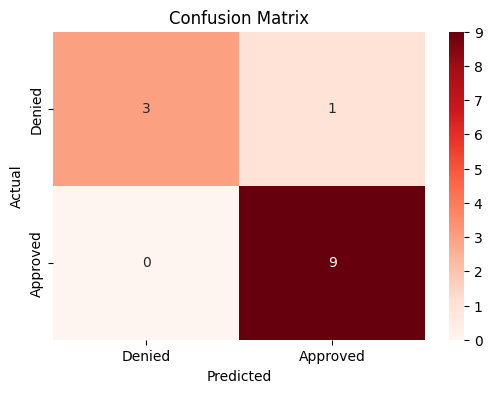

In [ ]:
conf_matrix = confusion_matrix(Y_test, Y_pred_test)

print('Confusion Matrix:')
print(conf_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['Denied', 'Approved'], yticklabels=['Denied', 'Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()